# Intro to Tensorflow (Deep Learning)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print(tf.__version__)

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

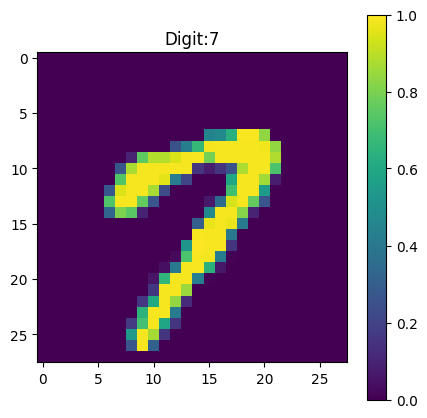

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(x_train[15])
plt.title(f"Digit:{y_train[15]}")
plt.colorbar()
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# SIEMPRE use_bias = TRUE!

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# SHAPE = Vector (60_000,)
y_train[0]

np.uint8(5)

In [10]:
# First, we have to compile our model...
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 327us/step - accuracy: 0.9009 - loss: 0.3414
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step - accuracy: 0.9505 - loss: 0.1676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.9604 - loss: 0.1300
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.9675 - loss: 0.1085
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.9709 - loss: 0.0942
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.9746 - loss: 0.0839
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.9765 - loss: 0.0754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.9791 - loss: 0.0676
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9804 - loss: 0.0616
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.9816 - loss: 0.0564


In [12]:
# 3, 2 y 10 en units
# Epoch 5/5
#1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.3568 - loss: 1.5880

# 256, 64 y 10
# Epoch 5/5
# 1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9243 - loss: 0.2424

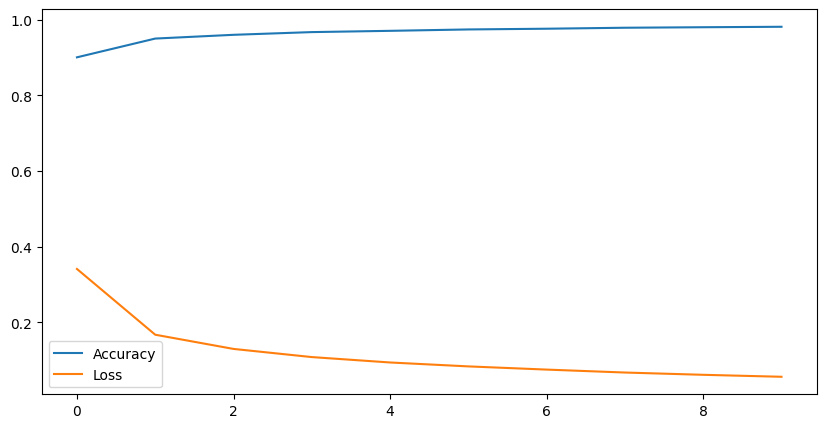

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label="Accuracy")
plt.plot(hist.history['loss'], label="Loss")
plt.legend()
plt.show()

In [14]:
# Loss y Accuracy
# [0.2176961600780487, 0.9319999814033508]
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.9689 - loss: 0.1115


[0.11149918287992477, 0.9689000248908997]

## GUARDAR MODELO

In [15]:
# model.save('./digits_net.keras', overwrite=False)

## CARGAR MODELO

In [16]:
loaded_model = tf.keras.models.load_model('./digits_net.keras')

In [18]:
loaded_model.evaluate(x_test, y_test)
# [0.1136203482747078, 0.9664999842643738]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.9665 - loss: 0.1136


[0.1136203482747078, 0.9664999842643738]